# Aplicação de detecção de anomalia utilizando Regressão Logística



In [11]:
#bibliotecas utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [12]:
#Importe do dataset
dataset_original = pd.read_excel('pzt2.xlsx', header=None)

display(dataset_original)

,0,1,2,3,4,5,6,7,8,9,...,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970
0,30000.0,162.179,162.080,162.019,162.019,162.019,162.069,162.069,162.118,162.019,...,186.107,186.107,186.163,186.051,186.051,186.265,186.321,186.265,186.051,186.016
1,30010.0,164.697,164.647,164.697,164.537,164.537,164.588,164.537,164.638,164.537,...,188.648,188.648,188.705,188.648,188.648,188.648,188.806,188.806,188.591,188.389
2,30020.0,167.906,167.906,167.906,167.957,167.906,167.957,167.906,168.009,167.744,...,191.525,191.525,191.684,191.684,191.684,191.684,191.684,191.684,191.467,191.367
3,30030.0,171.637,171.583,171.583,171.637,171.583,171.637,171.637,171.690,171.473,...,195.126,195.185,195.126,195.126,195.126,195.185,195.285,195.285,195.126,194.749
4,30040.0,174.364,174.364,174.364,174.364,174.141,174.197,174.141,174.252,174.197,...,200.095,200.033,200.095,200.095,200.095,200.095,200.254,200.095,200.033,199.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,69960.0,662.970,662.970,663.175,663.997,664.409,663.586,663.586,664.616,666.062,...,778.363,778.081,778.081,778.081,777.798,778.081,778.081,778.646,780.348,783.488
3996,69970.0,664.822,665.028,665.235,666.269,666.477,665.855,665.855,666.892,668.140,...,776.670,776.389,776.389,776.670,776.107,776.670,776.670,776.952,779.213,782.915
3997,69980.0,658.891,659.094,659.906,660.721,661.332,660.721,660.517,661.332,662.970,...,771.912,771.634,771.634,771.634,771.356,771.634,771.634,772.190,774.984,779.780
3998,69990.0,652.867,653.066,653.464,654.463,654.863,654.263,654.263,655.063,656.670,...,763.656,763.112,763.112,763.384,762.840,763.384,763.384,763.929,767.212,772.747


In [15]:
#Tratamento do dataset - Transpor dados
data = dataset_original.T

display(data)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,30000.000,30010.000,30020.000,30030.000,30040.000,30050.000,30060.000,30070.000,30080.000,30090.000,...,69910.000,69920.000,69930.000,69940.000,69950.000,69960.000,69970.000,69980.000,69990.000,70000.000
1,162.179,164.697,167.906,171.637,174.364,172.654,163.434,156.894,155.915,156.413,...,652.072,658.284,664.616,664.409,661.332,662.970,664.822,658.891,652.867,652.270
2,162.080,164.647,167.906,171.583,174.364,172.712,163.434,156.894,155.915,156.413,...,652.072,658.486,664.822,664.409,661.332,662.970,665.028,659.094,653.066,652.270
3,162.019,164.697,167.906,171.583,174.364,172.712,163.380,156.894,155.964,156.413,...,652.270,658.284,664.822,665.028,661.741,663.175,665.235,659.906,653.464,652.668
4,162.019,164.537,167.957,171.637,174.364,172.711,163.487,156.944,155.964,156.300,...,653.066,659.094,665.855,665.855,662.560,663.997,666.269,660.721,654.463,653.664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,186.265,188.648,191.684,195.185,200.095,207.909,219.236,217.125,193.262,182.750,...,788.100,789.262,786.076,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2967,186.321,188.806,191.684,195.285,200.254,208.136,219.166,217.437,193.196,182.920,...,787.810,789.262,785.787,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2968,186.265,188.806,191.684,195.285,200.095,208.071,219.236,217.229,193.440,182.920,...,788.390,789.552,786.364,785.211,780.064,778.646,776.952,772.190,763.929,751.599
2969,186.051,188.591,191.467,195.126,200.033,207.909,219.096,217.333,193.572,182.758,...,788.680,791.010,788.100,787.231,782.343,780.348,779.213,774.984,767.212,755.575


In [17]:
#Tratamento do dataset - Remover linha da frequencia e ruido
dataset_final = data.drop([0, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989], axis=0)

display(dataset_final)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
1,162.179,164.697,167.906,171.637,174.364,172.654,163.434,156.894,155.915,156.413,...,652.072,658.284,664.616,664.409,661.332,662.970,664.822,658.891,652.867,652.270
2,162.080,164.647,167.906,171.583,174.364,172.712,163.434,156.894,155.915,156.413,...,652.072,658.486,664.822,664.409,661.332,662.970,665.028,659.094,653.066,652.270
3,162.019,164.697,167.906,171.583,174.364,172.712,163.380,156.894,155.964,156.413,...,652.270,658.284,664.822,665.028,661.741,663.175,665.235,659.906,653.464,652.668
4,162.019,164.537,167.957,171.637,174.364,172.711,163.487,156.944,155.964,156.300,...,653.066,659.094,665.855,665.855,662.560,663.997,666.269,660.721,654.463,653.664
5,162.019,164.537,167.906,171.583,174.141,172.712,163.434,156.944,155.964,156.413,...,653.464,659.500,666.062,666.269,662.970,664.409,666.477,661.332,654.863,654.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,186.265,188.648,191.684,195.185,200.095,207.909,219.236,217.125,193.262,182.750,...,788.100,789.262,786.076,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2967,186.321,188.806,191.684,195.285,200.254,208.136,219.166,217.437,193.196,182.920,...,787.810,789.262,785.787,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2968,186.265,188.806,191.684,195.285,200.095,208.071,219.236,217.229,193.440,182.920,...,788.390,789.552,786.364,785.211,780.064,778.646,776.952,772.190,763.929,751.599
2969,186.051,188.591,191.467,195.126,200.033,207.909,219.096,217.333,193.572,182.758,...,788.680,791.010,788.100,787.231,782.343,780.348,779.213,774.984,767.212,755.575


In [69]:
#Definindo dados de treinamento
baseline = dataset_final.iloc[:330]
dano2 = dataset_final.iloc[990:1320]
dano3 = dataset_final.iloc[1320:1650]
dano4 = dataset_final.iloc[1650:1980]
dano5 = dataset_final.iloc[1980:2301]

X_train = pd.concat([baseline, dano2, dano3, dano4, dano5])

display(X_train)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
1,162.179,164.697,167.906,171.637,174.364,172.654,163.434,156.894,155.915,156.413,...,652.072,658.284,664.616,664.409,661.332,662.970,664.822,658.891,652.867,652.270
2,162.080,164.647,167.906,171.583,174.364,172.712,163.434,156.894,155.915,156.413,...,652.072,658.486,664.822,664.409,661.332,662.970,665.028,659.094,653.066,652.270
3,162.019,164.697,167.906,171.583,174.364,172.712,163.380,156.894,155.964,156.413,...,652.270,658.284,664.822,665.028,661.741,663.175,665.235,659.906,653.464,652.668
4,162.019,164.537,167.957,171.637,174.364,172.711,163.487,156.944,155.964,156.300,...,653.066,659.094,665.855,665.855,662.560,663.997,666.269,660.721,654.463,653.664
5,162.019,164.537,167.906,171.583,174.141,172.712,163.434,156.944,155.964,156.413,...,653.464,659.500,666.062,666.269,662.970,664.409,666.477,661.332,654.863,654.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306,184.381,184.563,184.715,186.098,188.140,190.534,192.861,195.898,197.637,197.746,...,788.971,784.349,778.646,768.864,757.713,748.186,736.355,728.838,729.832,733.330
2307,184.381,184.620,184.715,186.098,188.140,190.534,193.021,196.059,197.637,197.807,...,788.971,784.349,778.363,768.864,757.446,748.186,736.355,728.590,729.832,733.330
2308,184.439,184.620,184.876,186.258,188.083,190.693,193.021,196.059,197.637,197.807,...,789.552,784.923,778.929,769.417,758.250,748.709,736.861,729.086,730.080,733.832
2309,184.276,184.401,184.715,185.938,187.981,190.534,192.861,195.717,197.576,197.807,...,791.010,786.076,780.633,771.356,759.594,750.282,738.640,729.832,730.080,734.084


In [68]:
#Definindo os rótulos
y_train = []
for i in range(1641):
    y = 0 if i < 330 else 1
    y_train.append(y)

In [79]:
#Definindo dados de teste
baseline2 = dataset_final.iloc[330:660]
dano1 = dataset_final.iloc[660:990]
dano6 = dataset_final.iloc[2301:2631]
dano7 = dataset_final.iloc[2631:2970]

X_test = pd.concat([baseline2, dano1, dano6, dano7])

display(X_test)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
331,163.875,166.613,170.000,174.200,177.546,174.994,164.479,158.151,157.156,157.957,...,667.931,676.581,683.054,682.183,680.450,684.582,683.708,673.814,668.348,668.766
332,164.025,166.664,170.215,174.254,177.603,174.995,164.134,158.101,157.368,157.957,...,666.892,675.514,681.315,680.018,678.940,683.271,681.099,671.070,666.477,666.892
333,163.925,166.613,170.053,174.200,177.603,174.995,164.306,158.050,157.156,157.908,...,666.269,674.876,680.450,679.155,677.866,682.401,680.234,670.230,665.648,665.855
334,163.715,166.401,169.948,173.981,177.322,174.880,164.080,158.050,156.911,157.699,...,666.269,674.663,680.450,679.155,678.080,682.401,680.450,670.650,665.855,666.269
335,163.715,166.401,170.000,173.981,177.322,174.650,164.252,158.101,157.156,157.796,...,665.855,674.451,680.450,679.371,677.866,681.966,680.666,670.860,665.855,666.062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,186.265,188.648,191.684,195.185,200.095,207.909,219.236,217.125,193.262,182.750,...,788.100,789.262,786.076,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2967,186.321,188.806,191.684,195.285,200.254,208.136,219.166,217.437,193.196,182.920,...,787.810,789.262,785.787,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2968,186.265,188.806,191.684,195.285,200.095,208.071,219.236,217.229,193.440,182.920,...,788.390,789.552,786.364,785.211,780.064,778.646,776.952,772.190,763.929,751.599
2969,186.051,188.591,191.467,195.126,200.033,207.909,219.096,217.333,193.572,182.758,...,788.680,791.010,788.100,787.231,782.343,780.348,779.213,774.984,767.212,755.575


In [81]:
#Aplicar a regressão logística - solver='newton-cg'
classificador = LogisticRegression(solver='newton-cg').fit(X_train, y_train)

In [82]:
y_pred = classificador.predict(X_test)

In [83]:
#Identificação de anomalia
n_outliers = y_pred[y_pred == 1].size

print("Outliers identificados: ", n_outliers)

Outliers identificados:  782


In [84]:
#Identificação da condição natural
n_inliers = y_pred[y_pred == 0].size

print("Inliers identificados: ", n_inliers)

Inliers identificados:  538


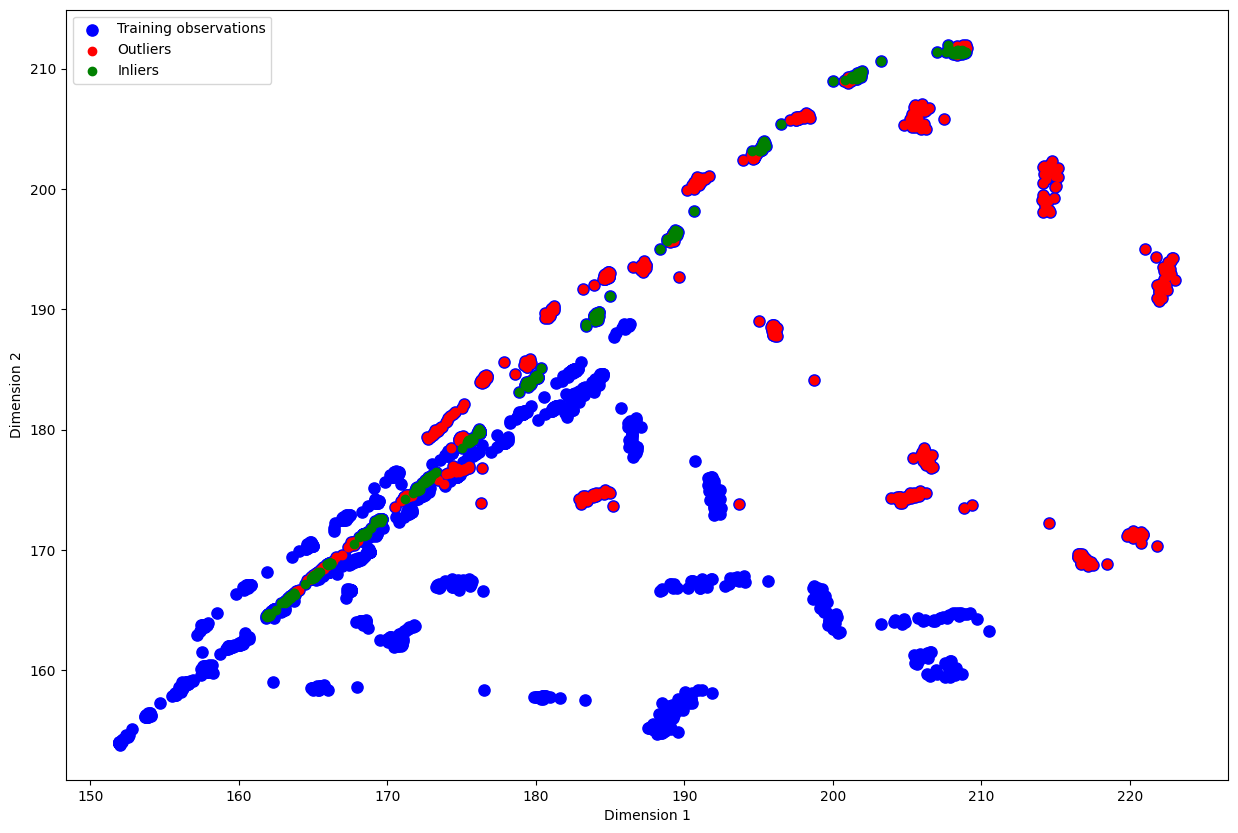

In [90]:
#Visualização dos resultados de predição
plt.figure(figsize=(15,10))
# filter outlier index
outlier_index = np.where(y_pred == 1)
# filter outlier values
outlier_values = dataset_final.iloc[outlier_index]

# filter inlier index
inlier_index = np.where(y_pred == 0)
# filter inlier values
inlier_values = dataset_final.iloc[inlier_index]

# plot data
a = plt.scatter(dataset_final[0], dataset_final[1], color = "b", s = 65)
# plot outlier values
b = plt.scatter(outlier_values[0], outlier_values[1], color = "r")
# plot inlier values
c = plt.scatter(inlier_values[0], inlier_values[1], color = "g")

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

plt.legend(
    [a, b, c],
    [
        "Training observations",
        "Outliers",
        "Inliers"
    ],
    loc="upper left",
)

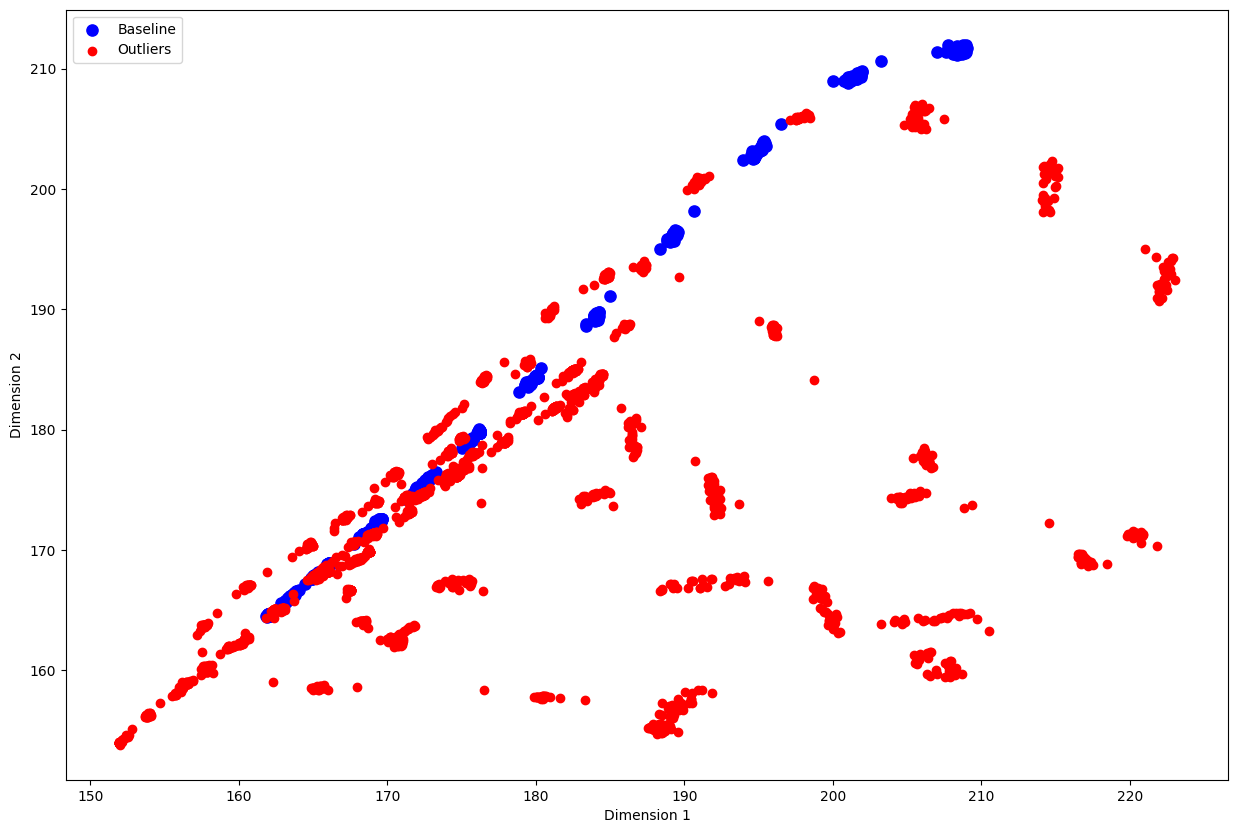

In [91]:
#Visualização do Dataset
plt.figure(figsize=(15,10))

base = dataset_final.iloc[0:660]
damage = dataset_final.iloc[660:2970]

# plot data
c = plt.scatter(base[0], base[1], color = "b", s = 65)
# plot outlier values
d = plt.scatter(damage[0], damage[1], color = "r")

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

plt.legend(
    [c, d],
    [
        "Baseline",
        "Outliers",
    ],
    loc="upper left",
)